After Convergence, Theta is: 
[-2.6205116   0.76037154  1.17194674]


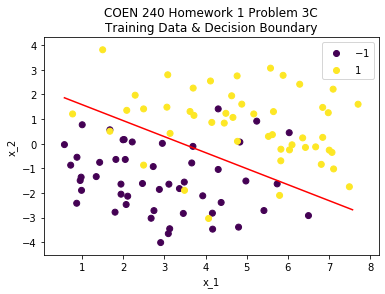

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import assign1 as a1

def mainA():
    # Parse in the raw data from x.txt and y.txt
    # Note to self (and professor/TA) - Never used pandas before, this took *forever* to figure out
    raw_x = pd.read_csv("x.txt", sep="\ +", names=["x_1","x_2"], header=None, engine='python')
    raw_y = pd.read_csv('y.txt', sep='\ +', names=["y"], header=None, engine='python')
    raw_y = raw_y.astype(int)

    # Form the X and Y matrices (X needs a column of 1s to account for theta0)
    x_mat = np.hstack([np.ones((raw_x.shape[0], 1)), raw_x[["x_1","x_2"]].to_numpy()])
    y_mat = raw_y["y"].to_numpy()

    # Initialize theta_0 matrix to a zero matrix as long as the x_mat (including the padded 1s)
    theta_0 = np.zeros(x_mat.shape[1])

    # Set the Tolerance (theta must change by a delta smaller than this to be considered converged)
    # I picked 1e-6 because it's fairly small and I don't want it to run *forever*
    tolerance = 1e-6
    
    # Execute the Newton Raphson Regression Method using the above inputs
    theta = a1.newton_raphson_regression(theta_0, x_mat, y_mat, tolerance)
    
    # Outputting the result
    print("After Convergence, Theta is: ")
    print(theta)
    
    
    # Plot the Data
    scatter = plt.scatter(x=raw_x['x_1'], y=raw_x['x_2'], c=raw_y['y'])
    
    # Plot the Logisitic Regression Output Decision Boundary
    
    #need the plot boundaries
    x1min = raw_x['x_1'].min()
    x1max = raw_x['x_1'].max()
    x2min = raw_x['x_2'].min()
    x2max = raw_x['x_2'].max()
    
    # Plotting the actual line now
    a = np.arange(x1min,x1max)
    b = ((-theta[0] - np.multiply(theta[1], a))) / theta[2] # x2 = (-theta0 - theta1*x1) / theta2
    plt.plot(a, b, 'r-')
    
    # Some clean-up to make the plot look better 
    plt.axis([x1min-0.5,x1max+0.5,x2min-0.5,x2max+0.5])
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.title("COEN 240 Homework 1 Problem 3C\nTraining Data & Decision Boundary")
    plt.legend(*scatter.legend_elements())
    
    # And saving it to make it easier to submit
    plt.savefig("Plot_Assign1_Problem3_C.png")

#if __name__ == "__main__":
    #main()

mainA()

After Convergence, Theta List is: 
[array([0., 0., 0.]), array([-1.50983811,  0.43509696,  0.62161752]), array([-2.21834632,  0.64372727,  0.95944716]), array([-2.55431051,  0.74137714,  1.13493588]), array([-2.61847133,  0.75979248,  1.1707512 ]), array([-2.62050954,  0.76037096,  1.17194549]), array([-2.6205116 ,  0.76037154,  1.17194674]), array([-2.6205116 ,  0.76037154,  1.17194674])]


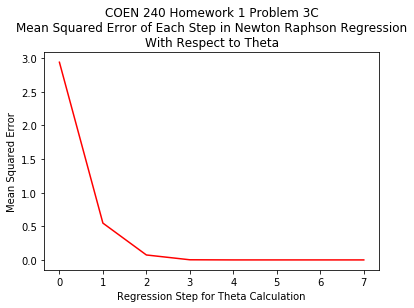

In [2]:
def mainB():
    # Parse in the raw data from x.txt and y.txt
    raw_x = pd.read_csv("x.txt", sep="\ +", names=["x_1","x_2"], header=None, engine='python')
    raw_y = pd.read_csv('y.txt', sep='\ +', names=["y"], header=None, engine='python')
    raw_y = raw_y.astype(int)

    # Form the X and Y matrices (X needs a column of 1s to account for theta0)
    x_mat = np.hstack([np.ones((raw_x.shape[0], 1)), raw_x[["x_1","x_2"]].to_numpy()])
    y_mat = raw_y["y"].to_numpy()

    # Initialize theta_0 matrix to a zero matrix as long as the x_mat (including the padded 1s)
    theta_0 = np.zeros(x_mat.shape[1])

    # Set the Tolerance (theta must change by a delta smaller than this to be considered converged)
    # I picked 1e-6 because it's fairly small and I don't want it to run *forever*
    tolerance = 1e-6
    
    # Execute the Newton Raphson Regression Method using the above inputs
    theta = a1.newton_raphson_regression(theta_0, x_mat, y_mat, tolerance)
    
    # Execute the theta_steps using the above inputs
    theta_list = a1.theta_steps(theta_0, x_mat, y_mat, tolerance)
    
    # Outputting the result
    print("After Convergence, Theta List is: ")
    print(theta_list)

    # Plotting the Mean Squared Error Function
    error = []
    for theta_pred in theta_list:
        mean_square_error = np.square(np.subtract(theta,theta_pred)).mean() 
        error.append(mean_square_error)
        
    a = range(0, len(theta_list))
    
    plt.plot(a, error, 'r-')
    
    # Some Labels and Saving the Fig
    plt.xlabel('Regression Step for Theta Calculation')
    plt.ylabel('Mean Squared Error')
    plt.title("COEN 240 Homework 1 Problem 3C\nMean Squared Error of Each Step in Newton Raphson Regression\nWith Respect to Theta")
    
    plt.savefig("Plot_Assign1_Problem3_C_2.png")

mainB()